<center><h1>Wang_Ruiqi_HW2 7684289412</h1></center>
<br>
<br>

Name: Ruiqi Wang 
<br>
Github Username: Ritawang101
<br>
USC ID: 7684289412

## 1. Combined Cycle Power Plant Data Set

### (a) Download Data

Package imports

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
import pandas as pd

In [104]:
import pandas as pd
pp = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx")
pp

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


Get the Cycle Power Plant Data Set

### (b) Exploring the data

#### i. rows and columns

In [108]:
#print the column names
print (pp.columns)
count_row = pp.shape[0]  # Gives number of rows
count_col = pp.shape[1]  
count_row
count_col
print(f'Number of row is {count_row}; Number of Column is {count_col}')
print("Each column consists of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH)"
"and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant. Each row represents the power plant")

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')
Number of row is 9568; Number of Column is 5
Each column consists of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH)and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant. Each row represents the power plant


#### ii. pairwise scatterplots of all the varianbles

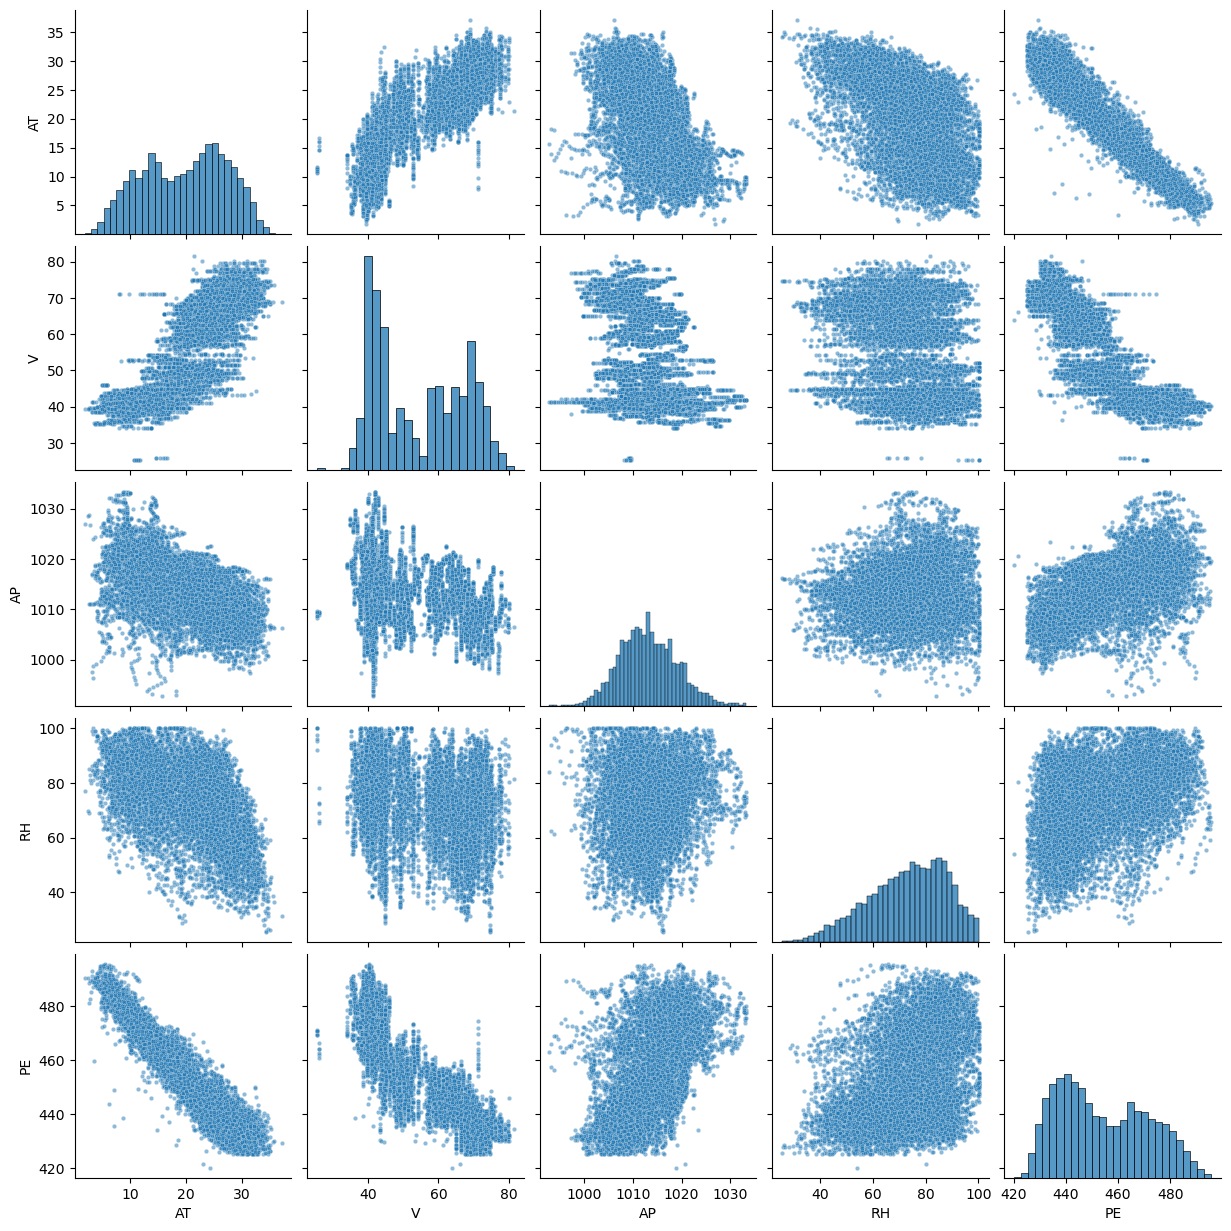

In [110]:
sns.pairplot(pp,plot_kws={"s": 10, "alpha": 0.5} )
plt.show() 

**Description**: 
In this graph, AT has negative linear relationship with PE which is very obvious. Vacaam also has negation linear relation with EP which means higher exhaust vacuum with lower energy output. AP has a weak positive linear relation with PE which means higher AP with higher PE. However, the relation between RH and PE is not very obvious but it skews toward higher value

#### iii. mean, the median, range, first and third quartiles, and interquartile ranges

In [113]:
describe = pp.describe().T
describe["mean"] = pp.mean()
describe["median"] = pp.median()
describe["range"] = describe["max"] - describe ["min"]
describe["Q1"] = pp.quantile(0.25)
describe["Q3"] = pp.quantile(0.75)
describe["IQR"] = describe["Q3"] - describe["Q1"]
describe

,count,mean,std,min,25%,50%,75%,max,median,range,Q1,Q3,IQR
AT,9568.0,19.651231,7.452473,1.81,13.5100,20.345,25.72,37.11,20.345,35.30,13.5100,25.72,12.2100
V,9568.0,54.305804,12.707893,25.36,41.7400,52.080,66.54,81.56,52.080,56.20,41.7400,66.54,24.8000
AP,9568.0,1013.259078,5.938784,992.89,1009.1000,1012.940,1017.26,1033.30,1012.940,40.41,1009.1000,1017.26,8.1600
RH,9568.0,73.308978,14.600269,25.56,63.3275,74.975,84.83,100.16,74.975,74.60,63.3275,84.83,21.5025
PE,9568.0,454.365009,17.066995,420.26,439.7500,451.550,468.43,495.76,451.550,75.50,439.7500,468.43,28.6800


### (c) Simple Linear Regression

AT                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:49   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      

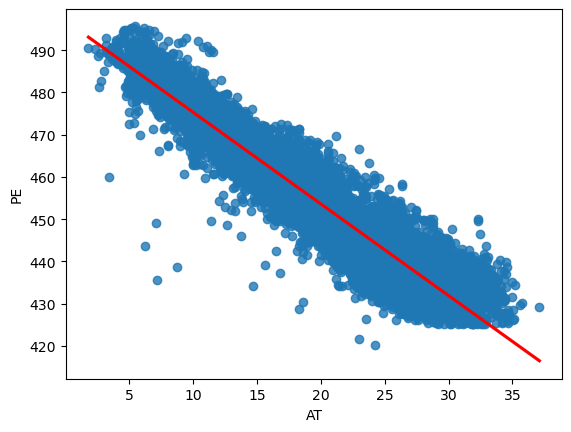

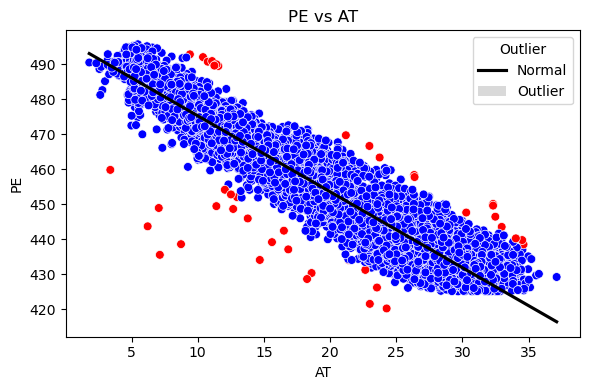

V                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:50   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0

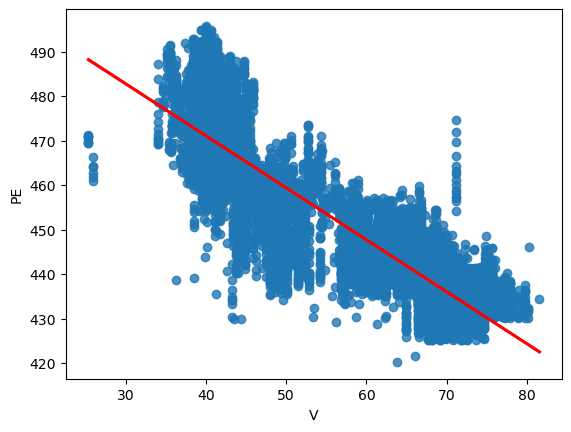

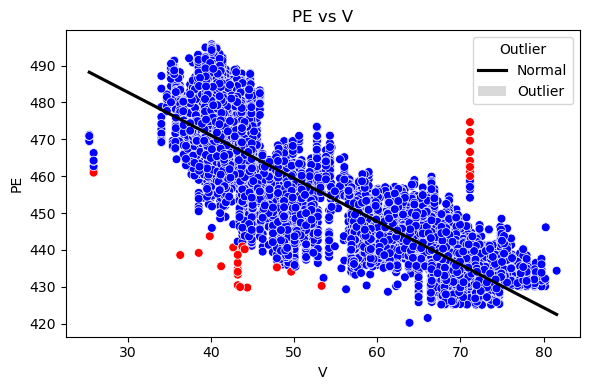

AP                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:51   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      

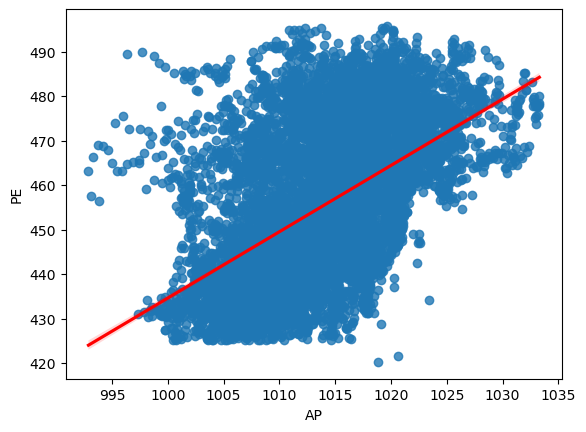

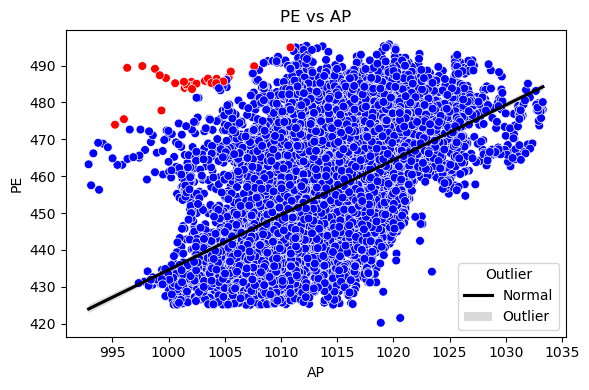

RH                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:53   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      

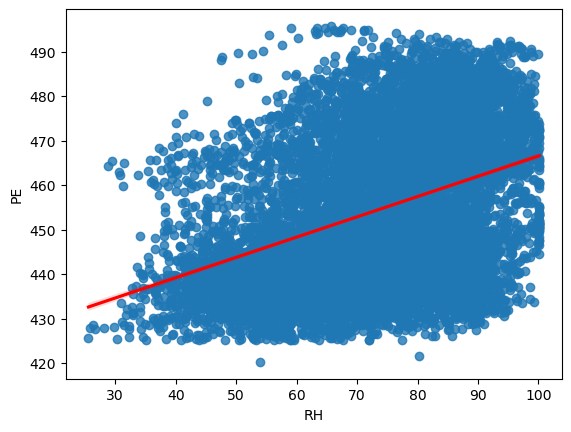

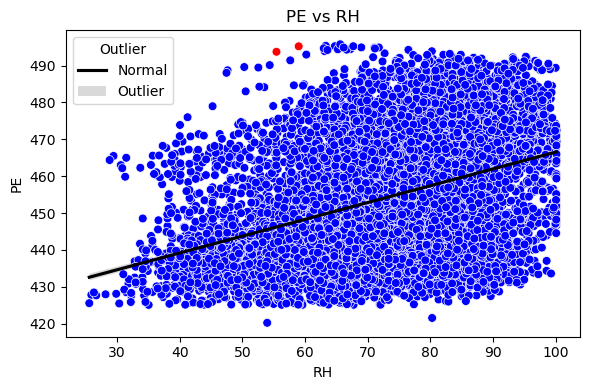

In [115]:
for col in ['AT','V','AP','RH']: 
    model = smf.ols(formula= f"PE ~ {col}", data=pp).fit()
    residuals = model.resid
    z_scores = (residuals - np.mean(residuals)) / np.std(residuals)
    outlier_idx = np.where(np.abs(z_scores) > 3)[0]
    is_out = pp.index.isin(outlier_idx)

    print(col,model.summary())  
    sns.regplot(x=pp[col], y=pp["PE"],
                line_kws={"color":"red"}) 
    pp["outlier"] = is_out.astype(int)
    plt.figure(figsize=(6, 4))
    sns.regplot(x=pp[col], y=pp["PE"], scatter=False, line_kws={"color": "black"})
    sns.scatterplot(data=pp, x=col, y="PE", hue="outlier", palette={0: "blue", 1: "red"}, s=40)
    plt.title(f"PE vs {col}")
    plt.legend(title="Outlier", labels=["Normal", "Outlier"])
    plt.tight_layout()
    plt.show()


**Description: All independent variable is statistically significant due to the near-zero p value**

**Description between AT and PE**: For the linear regression between PE and AT, the slope is **negative** meaning that every 1 degree increasing in ambient environment will cause the net electrical output decreasing by about 2.17 MW on average. The R square is very high nearly 90% which mean 90 percent of variance in PE can be explained by Ambient Tempreture. **The P is less than 0.001 which shows this is statistically significant**. The **Kurtosis** of AT is the highest one nearly **4.621**. This is **leptokurtic distribution** which has a greater likelihood of extreme events as compared to a normal distribution., i would like to**remove the outlier here**. 

**Description between V and PE**: For the linear regression between PE and V, the coefficient is negative showing the negative linear regression. The R square is also very high showing that **roughly 76% of the variation in PE can be explained by V** alone which is a strong linear association. The Kurtosis is 3.487 which showing this is still a **leptokurtic distribution** with a heavier tail, **i would like to remove the outlier here**. 

**Description between AP,RH and PE**: These two variables show  **positive linear relationship** which the coeficient is positive. The R square is not very high both less than 30%. However, the Kurtosis is less than 3 showing the outlier issue is not severe. 

### (d) Multiple Regression

In [118]:
multi_model = smf.ols("PE ~ AT + V + AP + RH", data=pp).fit()
print(multi_model.summary())
print(multi_model.pvalues)
print("ALL the p values for the four independent variables are statistically significant because the p-values are < 0.001"
        "There are enough evidence to reject the null hypothsis" )

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:54   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

### (e) 1c Compare to 1d

      Simple  Multiple
AT -2.171320 -1.977513
V  -1.168135 -0.233916
AP  1.489872  0.062083
RH  0.455650 -0.158054


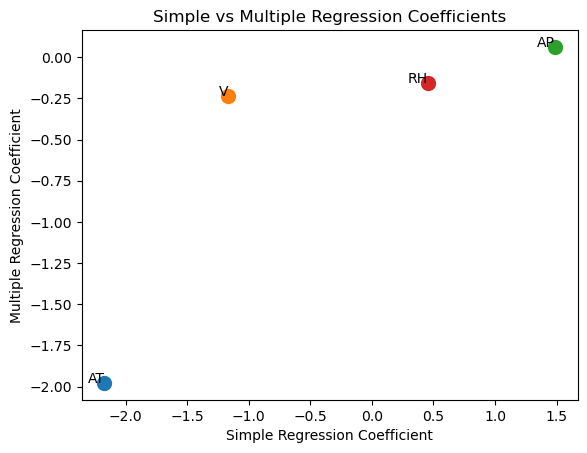

In [120]:
simple_coefs = {}
for col in ['AT','V','AP','RH']:
    model = smf.ols(formula=f"PE ~ {col}", data=pp).fit()
    simple_coefs[col] = model.params[col]
multi_model = smf.ols("PE ~ AT + V + AP + RH", data=pp).fit()
multi_coefs = multi_model.params.drop("Intercept") 
coef_compare = pd.DataFrame({
    "Simple": pd.Series(simple_coefs),
    "Multiple": multi_coefs
})
print(coef_compare)
for predictor in simple_coefs.keys():
    x=simple_coefs[predictor]
    y=multi_coefs[predictor]
    plt.scatter(x,y,s=100)
    plt.text(x,y,predictor,fontsize=10, ha="right")
plt.xlabel("Simple Regression Coefficient")
plt.ylabel("Multiple Regression Coefficient")
plt.title("Simple vs Multiple Regression Coefficients")
plt.show()

**Description**
in the Multi Regression, the R squre is larger than any of predictor's in simple regression, which showing a better fit model. Due to multicollinearity, the coefficients of predictors in multi regression shift. 

### (f) Nonlinear Association

In [123]:
p_values = {} 
for predictor in ['AT','V','AP','RH']:
    X = pp[[predictor]]
    y = pp['PE']
    poly = PolynomialFeatures(degree=3, include_bias=False)
    X_poly = poly.fit_transform(X) 
    X_poly = sm.add_constant(X_poly)
    model = sm.OLS(y, X_poly).fit()
    p_values[predictor] = model.pvalues
    print(f"\n=== {predictor} cubic regression ===")
    print(f"summary {predictor} is {model.summary()}")


=== AT cubic regression ===
summary AT is                             OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:54   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const    

In [124]:
p_values
print(p_values)
for predictor, pvals in p_values.items():
    print(f'{predictor}')
    for term, p in pvals.items():           
        if p < 0.05:                        
            print(f"   {term}: significant (p={p:.4g})")
        else:
            print(f"   {term}: NOT significant (p={p:.4g})")

{'AT': const     0.000000e+00
x1        7.898147e-07
x2        8.833045e-73
x3       3.652185e-110
dtype: float64, 'V': const    0.000000
x1       0.000025
x2       0.768497
x3       0.013735
dtype: float64, 'AP': const    4.502734e-17
x1       4.502735e-17
x2       3.666705e-17
x3       8.264146e-18
dtype: float64, 'RH': const    0.000000
x1       0.000377
x2       0.000009
x3       0.000014
dtype: float64}
AT
   const: significant (p=0)
   x1: significant (p=7.898e-07)
   x2: significant (p=8.833e-73)
   x3: significant (p=3.652e-110)
V
   const: significant (p=0)
   x1: significant (p=2.527e-05)
   x2: NOT significant (p=0.7685)
   x3: significant (p=0.01373)
AP
   const: significant (p=4.503e-17)
   x1: significant (p=4.503e-17)
   x2: significant (p=3.667e-17)
   x3: significant (p=8.264e-18)
RH
   const: significant (p=0)
   x1: significant (p=0.0003773)
   x2: significant (p=9.395e-06)
   x3: significant (p=1.44e-05)


Conclusion: 
for AT,**Both Quadratic term and Cubic term  is statistically significant** (p-value = 0.00)

for V, **Only Cubic term is statistically significant p < 0.05**
                    
for AP,**Both Quadratic term and Cubic term  is statistically significant** 
                    
for RH, **Both Quadratic term and Cubic term  is statistically significant** 

### (g) Interactions of Predictors

In [127]:
X = pp.iloc[:, :-1]       
y = pp['PE']
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_interactions = poly.fit_transform(X)
X_interactions = sm.add_constant(X_interactions)
interaction_model = sm.OLS(y, X_interactions).fit() 
coeficient= interaction_model.params
p_values = interaction_model.pvalues
result = pd.concat([coeficient, p_values],axis=1)
result.columns = ['Coefficient', 'p-value']
print(result)
print(interaction_model.summary())
for term, p in result["p-value"].items(): 
    if p < 0.05:
        print(f"{term}: significant (p={p:.4g})")
    else:
        print(f"{term}: not significant (p={p:.4g})")

        Coefficient   p-value
const -1.618901e-10  0.990396
x1     8.526513e-13  0.989160
x2    -8.526513e-14  0.996609
x3     2.540190e-13  0.984510
x4     2.486900e-13  0.981865
x5     1.000000e+00  0.000000
x6    -7.459311e-17  0.998018
x7    -3.747003e-16  0.995119
x8    -2.775558e-17  0.998663
x9     0.000000e+00  1.000000
x10   -1.387779e-17  0.999423
x11    1.075529e-16  0.989337
x12   -6.245005e-17  0.995888
x13   -5.551115e-17  0.995805
x14   -4.753142e-16  0.985013
x15   -4.857226e-17  0.995708
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.139e+25
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:55   Log-Likelihood:             2.1246e+05
No. Observations

Conclusion: 
x2, x3, x4, x5, x7, x8, x10 are Significant Predictors which means they impact on predicting PE.
However x1, x6, x9 are insignificant predictors

### (h) Improvement

In [130]:
#Model 1


X = pp[['AT','V','AP','RH']]
y = pp['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)
reg_model = sm.OLS(y_train, X_train_sm).fit()
y_train_predi = reg_model.predict(X_train_sm)
y_test_predi = reg_model.predict(X_test_sm)
reg_train_mse = mean_squared_error(y_train, y_train_predi)
reg_test_mse = mean_squared_error(y_test, y_test_predi) 
print(reg_model.summary())
print(f'the MSE of training model is {reg_train_mse}, the MSE of test model is {reg_test_mse}')


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.167e+04
Date:                Fri, 26 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:55   Log-Likelihood:                -19660.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.936e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        458.3988     11.562     39.649      0.0

In [131]:
# Nonlinear model 

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
xtrain_np = poly.fit_transform(X_train)
xtest_np  = poly.transform(X_test)
feat_names = poly.get_feature_names_out(X_train.columns)     
X_train_poly = pd.DataFrame(xtrain_np, columns=feat_names, index=X_train.index)
X_test_poly  = pd.DataFrame(xtest_np,  columns=feat_names, index=X_test.index)
regmodel_2 = sm.OLS(y_train, X_train_poly).fit()
pv = regmodel_2.pvalues
factors = {'AT','V','AP','RH','const'}

sig_terms = [term for term, p in pv.items()
             if (p <= 0.05) or (term in factors)]
regmodel_2 = sm.OLS(y_train, X_train_poly[sig_terms]).fit()
print(regmodel_2.summary())
y_tr_2 = regmodel_2.predict(X_train_poly[sig_terms])
y_te_2 = regmodel_2.predict(X_test_poly[sig_terms])
mean_squared_train2 = mean_squared_error(y_train, y_tr_2)
mean_squared_test2 = mean_squared_error(y_test, y_te_2)
print("mean_squared_train2 is", mean_squared_train2)
print("mean_squared_test2 is", mean_squared_test2)


                                 OLS Regression Results                                
Dep. Variable:                     PE   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          9.261e+06
Date:                Fri, 26 Sep 2025   Prob (F-statistic):                        0.00
Time:                        12:40:55   Log-Likelihood:                         -19302.
No. Observations:                6697   AIC:                                  3.862e+04
Df Residuals:                    6689   BIC:                                  3.867e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### (i) KNN

In [133]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
X = pp[['AT','V','AP','RH']]
y = pp['PE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  
train_errors = []
test_errors = []
for k in range(1,101): 
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test) 
    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))
min_error = min(test_errors)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)
normalized_train_errors = []
normalized_test_errors = []
for k in range(1, 101):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_pred_scaled = knn.predict(X_train_scaled)
    test_pred_scaled = knn.predict(X_test_scaled)
    normalized_train_errors.append(mean_squared_error(y_train, train_pred_scaled))
    normalized_test_errors.append(mean_squared_error(y_test, test_pred_scaled))
min_error_scaled = min(normalized_test_errors)
best_k  = test_errors.index(min(test_errors)) + 1
best_k_scaled = normalized_test_errors.index(min(normalized_test_errors)) + 1
print(f'before scaling, best_k is {best_k},min error is {min_error}')
print(f'after scaling, best_k is {best_k_scaled},min error is {min_error_scaled}') 


before scaling, best_k is 5,min error is 15.704821203761764
after scaling, best_k is 4,min error is 14.070606067136888


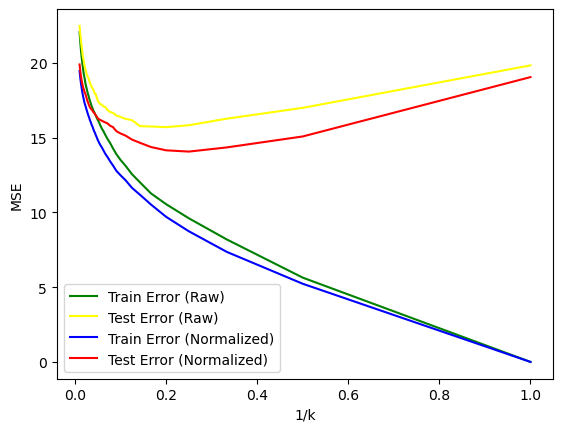

In [134]:
plt.plot(1/np.arange(1,101), train_errors, label="Train Error (Raw)", color="green")
plt.plot(1/np.arange(1,101), test_errors, label="Test Error (Raw)", color="yellow")
plt.plot(1/np.arange(1,101), normalized_train_errors, label="Train Error (Normalized)", color="blue")
plt.plot(1/np.arange(1,101), normalized_test_errors, label="Test Error (Normalized)", color="red")
plt.xlabel("1/k")
plt.ylabel("MSE")
plt.legend()
plt.show()

### (j ) Compare KNN and Linear

In [136]:
print(f'the lowerst MSE achieved in normalized KNN {min_error_scaled}, but the lowerst MSE for linear model is {mean_squared_test2},' 
f'which shows KNN fits better,which suggests the data has nonlinear structure that KNN captures better.') 

the lowerst MSE achieved in normalized KNN 14.070606067136888, but the lowerst MSE for linear model is 18.806668579618098,which shows KNN fits better,which suggests the data has nonlinear structure that KNN captures better.


## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

**Flexible** When the sample size is very large, the model’s bias remains low. With lots of data, the high variance problem (their main weakness) is reduced. Bias becomes the main issue, and flexible methods generally have lower bias. Because the number of predictors is small, the computation is not too complicated which can be managed. 

### (b) The number of predictors p is extremely large, and the number of observations n is small.

**Inflexible** Limited observations easily result in a higher variation. If the number of p is large, a small change in data will trigger large changes of model. A inflexible method can make the predictors more intepretable and managable with lower change to overfit the data 

### (c) The relationship between the predictors and response is highly non-linear.

**Flexible**. This will be more adjustable for non-linear model which capture the complexity in the data which can intepret predictors 
better which improve the accuracy. 

### (d) The variance of the error terms, i.e. $σ^2$ = Var(ε), is extremely high.

**Inflexible** When variance is high, the bias is comparatively low which is easily to trigger overfitting. The data might be sparse. An inflexible model will prevent capturing too much noise in the data to reduce the noise. 

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [148]:
df = {
    "Obs": [1, 2, 3, 4, 5, 6],
    "X1": [0, 2, 0, 0, -1, 1],
    "X2": [3, 0, 1, 1, 0, 1],
    "X3": [0, 0, 3, 2, 1, 1],
    "Y": ["Red", "Red", "Red", "Green", "Green", "Red"]
}
df = pd.DataFrame(df)
df
distance = np.sqrt((df["X1"]-0)**2 + (df["X2"]-0)**2 + (df["X3"]-0)**2)
print(f'the distance to different point is {distance}')

the distance to different point is 0    3.000000
1    2.000000
2    3.162278
3    2.236068
4    1.414214
5    1.732051
dtype: float64


### (b) What is our prediction with K = 1? Why?

if K = 1, the shortest distance is 1.414 to observation 5. So the predicted result will be **green**

### (c) What is our prediction with K = 3? Why?

if K=3, the first three shortest distance will be 1.414 which belongs to Green, 1.732 which belongs to Red,
and 2 which belongs to red. Thus, the predicted result will be **Red** 

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

**A Small K**, small K will be more flexible which can capture complex data better. Smaller K can be with higher variation which is 
sensitive to the complex training data